In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [14]:
batch_size_train = 4
batch_size_test = 4

#train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=256, crop=224)

encoding_dim = 1024
lr = 0.1
momentum = 0.5
log_interval = 10
n_epochs = 1

Loaded image shape in tensor: torch.Size([4, 1, 224, 224])


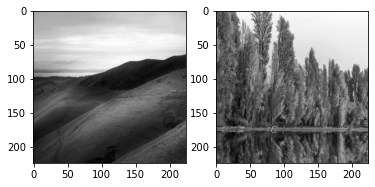

In [15]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))
if isinstance(x, list): # if MNIST
    x = x[0]; x_test = x_test[0]
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray', "viridis"][0]);
img1 = x[0][0].numpy()#.transpose((1, 2, 0))
img2 = x_test[0][0].detach().numpy()#.transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [16]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr, weight_decay=1e-5)

Shape : torch.Size([4, 1, 224, 224])


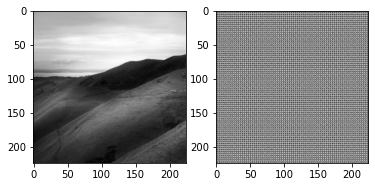

In [17]:
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0]);
axes[0].imshow(x[0][0].numpy()); 
reconstructed = autoencoder(x)
print(f"Shape : {reconstructed.shape}")
axes[1].imshow(reconstructed[0][0].detach().numpy())

In [40]:
%time train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=4)

Epoch 1/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.69it/s]


train loss -40.983674


100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.04it/s]


valid loss -43.932099

Epoch 2/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.59it/s]


train loss -40.818829


100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.04it/s]


valid loss -43.494249

Epoch 3/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.59it/s]


train loss -40.866530


100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.03it/s]


valid loss -43.112380

Epoch 4/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.54it/s]


train loss -40.442698


100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.04it/s]

valid loss -43.347644

CPU times: user 1h 52min 41s, sys: 2min 9s, total: 1h 54min 51s
Wall time: 7min 15s


In [41]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]

Image 0


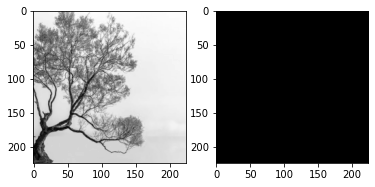

In [53]:
#z = autoencoder(x)
i = np.random.randint(batch_size_test)
print(f"Image {i}")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[i][0].cpu()); axes[1].imshow(autoencoder(x)[i][0].detach().cpu())

In [ ]:
model = C_Autoencoder(28*28, encoding_dim).to(device)
model.load_state_dict(torch.load("saved_models/model_c-autoenc28.sav"))

In [ ]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(model(x)[0][0].detach().cpu())